In [1]:
import math
import sklearn
import skimage
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from PIL import Image
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.measure import block_reduce
from skimage.restoration import denoise_tv_chambolle
from skimage.filters import median
from skimage.filters.rank import mean_bilateral
from skimage.filters.rank import mean
import glob
import gc
import random

In [2]:
def get_tile_x(image_number): #Gets the horizontal position of the tile (0 on the left)
    return np.mod(image_number,horizontal_number)

In [3]:
def get_tile_y(image_number): #Gets the vertical position of the tile (0 at the top)
    return np.floor_divide(image_number,horizontal_number)

In [4]:
def get_tile_point(image_number): #Gets the horizontal and vertical positions of the tile as a tuple of the form (hori, vert), 0,0 in top left
    return (np.mod(image_number,horizontal_number),np.floor_divide(image_number,horizontal_number))

In [5]:
def get_tile_number(tile_point): #Gets the number of a tile from its point in the grid
    return(tile_point[0]+horizontal_number*tile_point[1])

In [ ]:
ims = [plt.imread(path) for path in glob.glob("C:/Users/rwfbl/downscale_me/*.tif")]


In [ ]:
ims = 0
gc.collect()
gc.collect()

In [9]:
horizontal_number = 14
vertical_number = 34

In [ ]:
ims_downscaled = []
for i in range(len(ims)):
    #print(i)
    ims_downscaled.append((skimage.transform.downscale_local_mean(ims[i], (2,2))).flatten())
ims_downscaled_array = np.array(ims_downscaled)    
ims_downscaled_array = ims_downscaled_array*((256*256)-1)/255


    

In [ ]:

for i in range(vertical_number):
    for j in range(horizontal_number):
        print(i+1,j+1)
        pos_in_list = (horizontal_number*i)+j
        to_save = ims_downscaled_array[pos_in_list].reshape(512,768)
        to_save = to_save.astype(np.uint16)
        to_save = Image.fromarray(to_save)
        if i>=9 and j>=9:
            thing = 1
            to_save.save('halfdownscaled_'+str(i+1)+'_'+str(j+1)+'.png')
        elif i<9 and j<9:
            thing = 1
            to_save.save('halfdownscaled_0'+str(i+1)+'_0'+str(j+1)+'.png')
        elif i<9:
            thing = 1
            to_save.save('halfdownscaled_0'+str(i+1)+'_'+str(j+1)+'.png')
        elif j <9:
            thing = 1
            to_save.save('halfdownscaled_'+str(i+1)+'_0'+str(j+1)+'.png')
ims_downscaled = 0
ims_downscaled_array = 0

In [7]:
#glob.glob("C:/Users/rwfbl/Tilesets/John4/Full_size/*.tif")[0]

'C:/Users/rwfbl/Tilesets/John4/Full_size\\Tile_001-001-000000_0-000.s0001_e01.tif'

In [13]:
#Memory efficient downscaling
downscale_factor = 2
for i in range(vertical_number):
    for j in range(horizontal_number):
        print(i+1,j+1)
        pos_in_list = (horizontal_number*i)+j
        path = glob.glob("C:/Users/rwfbl/Tilesets/John4/Full_size/*.tif")[pos_in_list]
        image = plt.imread(path)
        image_downscaled = skimage.transform.downscale_local_mean(image, (downscale_factor,downscale_factor)).flatten()
        image_downscaled = image_downscaled*((256*256)-1)/255
        to_save = image_downscaled.reshape(int(image.shape[0]/downscale_factor),int(image.shape[1]/downscale_factor))
        to_save = to_save.astype(np.uint16)
        to_save = Image.fromarray(to_save)
        if i>=9 and j>=9:
            thing = 1
            to_save.save('halfdownscaled_'+str(i+1)+'_'+str(j+1)+'.png')
        elif i<9 and j<9:
            thing = 1
            to_save.save('halfdownscaled_0'+str(i+1)+'_0'+str(j+1)+'.png')
        elif i<9:
            thing = 1
            to_save.save('halfdownscaled_0'+str(i+1)+'_'+str(j+1)+'.png')
        elif j <9:
            thing = 1
            to_save.save('halfdownscaled_'+str(i+1)+'_0'+str(j+1)+'.png')
        image = 0
        image_downscaled = 0
        to_save = 0
        gc.collect()

1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
11 12
11 13
11 14
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
13 12
13 13
13 14
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
14 12
14 13
14 14
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
15 11
15 12
15 13
15 14
1

In [ ]:
ims = 0

In [ ]:
gc.collect()

In [6]:
ims_downscaled_array = np.array([plt.imread(path) for path in glob.glob("C:/Users/rwfbl/Tilesets/John4/Halfdownscaled/*.png")])*256
#holy_ims_downscaled_array = ims_downscaled_array.copy()

In [7]:
def deSnow_masks(mask_set, may_be_changed, may_become, repeat_number = 1, window_size = 3, die_number = 2, grow_number = 4, verbose = False): 
    #This is a function which aims to smooth over a set of masks, here provided as a 4-index array
    #The idea is that the features identified by masks shouldnt be lone pixels, and therefore that lone pixels in mask A surrounded
    #by members of mask B, should be transferred over to mask B

    #mask_set is a number of mask types * number of tiles * tile size array
    #may_be_changed is a list of the mask types whose errant pixels are considered 
    #may_become is a list of the mask types a pixel may be placed in
    #repeat_number is the number of times the process should be applied
    #window_size is the edge length of a square moving window for the average, if you'd like a more complicated shape, see below
    #die_number is the number of members of a mask in a window surrounding and including the target that <= the pixel should be changed
    #grow_number is the number of members of a mask in a windo surrounding and including the target that >= the pixel should become a member of that other mask

    #for window_size = 3
    #die_numbers >=3 destroy 1-pixel lines, which many of the fine cracks are
    #Grow numbers <=3 seem to lead to no abandons, >=5 prevent double counting

    #Can mix and match what can be changed to what in case you want to be conservative about some of the masks (i.e. mischaracterising a plag pixel as bright or black is less of an issue than mischaracterising either bright or black as plag)
    
    #Each tile bears no relation to others so we only need to store one tile at a time


    window = np.ones((window_size,window_size)) #Size of the area being checked
    print(mask_set.shape)
    n_tiles = mask_set.shape[1]
    n_mask_types = mask_set.shape[0]
    mask_dim1 = mask_set.shape[2]
    mask_dim2 = mask_set.shape[3]
    

    for l in range(repeat_number):
        print("Doing repeat ",l)
        for i in range(n_tiles):
            local_count_set = np.zeros((n_mask_types,mask_dim1,mask_dim2), dtype=np.uint8)
            needs_changing = [] #Storage object for which elements of each mask are looking to be changed


            for j in range(n_mask_types): #Number of types of mask
                local_count_set[j] = mean((window_size**2)*mask_set[j,i], footprint=window) #Count the number of pixels in a 3x3 grid around each pixel belonging to each type of mask
                needs_changing.append((local_count_set[j]<=die_number)*mask_set[j,i])
                #print(((local_count_set<=die_number)*mask_set[j,i]).shape)


            #needs_changing_to = needs_changing.copy()
            #needs_changing
            
            for j in range(n_mask_types): #Mask type whose "needs changing" are being considered
                if j in may_be_changed:
                    for k in range(n_mask_types): #Mask type which the pixel to be changed gets placed in 
                        if k in may_become:

                            #Set the values which need to be changed to whether they should be in each other mask type
                            #Iterate each needs changing over each mask
                            mask_set[k,i, needs_changing[j]] = (local_count_set[k, needs_changing[j]]>=grow_number) #If a pixel to be changed has a majority of one type of pixel next to it, it becomes that type
                            #This simultaneously removes it from the mask it came from
                        
                    

            #Alt approach: make array of values representing which mask all "needs changing" values should change to, then distribute them
            #needs_changing_to[needs_changing[j]] = np.argwhere(np.max(local_count_set[:,needs_changing[j]]))[random.choices(np.arange(len(np.argwhere(np.max(local_count_set[:,needs_changing[j]])))))] #I hate this line so much

            if verbose:
                print("Tile number ",i, "had ",len(np.argwhere(np.sum(mask_set[:,i,:,:], 0)==0)), "pixels abandoned in step ",l+1)
                print("Tile number ",i, "had ",len(np.argwhere(np.sum(mask_set[:,i,:,:], 0)>1)), "pixels double counted in step ",l+1)
                #In the case where a pixel from mask A has exactly 4 neighbours from mask B and 4 from mask C, this abandons the pixel
                #This is probably fine and should be rare, but it might be worth me counting them
    
    gc.collect() #This just seems a good idea
    return mask_set

    

            
            


    
            


In [10]:
inboard_tile_numbers = [] #Numbers for the tiles which contain sample and are neither left nore right-hand edges
black_tile_numbers = [] #Numbers for the tiles which are considered "black", those which are at least 90% empty space without plag
edge_tile_numbers = [] #Numbers for the tiles which are considered "edges", those which are between 
sample_tile_numbers = []
right_hand_edge_numbers = []
left_hand_edge_numbers = []
grid_tile_numbers = [] #Numbers for tiles >95% sample, which will be used for identifying the grid artefact
grid_numbers = [] #grid tile numbers excluding those which are also left or right edges
original_black_masks = []
original_bright_masks = []
original_plag_masks = []


#Extensive experimentation with this shows that a dynamic bright threshold would likely be very useful, and a dynamic black threshold would be nice
black_threshold = 80
bright_threshold = 143

#manual_ignores = [357, 378] #For John2
#manual_ignores = [] #For John3
manual_ignores = np.array([1, 2, 15, 435, 436, 449, 450, 451, 463, 464, 465, 466, 475, 476])-1 #For John4
#manual_ignores = np.array([1, 23, 24, 25, 48, 49, 72, 96, 120, 384, 408, 409, 432, 433, 456, 457, 479, 480, 481, 482, 503, 504])-1 #For John5
#manual_ignores = np.array([1, 23, 24, 25, 48, 49, 72, 96, 120, 384, 408, 409, 432, 433, 456, 457, 479, 480, 481, 482, 503, 504])-1
ims_downscaled_array[manual_ignores] = ims_downscaled_array[manual_ignores]*0.1


#ims_downscaled_array[manual_ignores] = ims_downscaled_array[manual_ignores]*0.1

for i in range(len(ims_downscaled_array)):
#for i in range(50):
    original_black_masks.append(ims_downscaled_array[i]<black_threshold)
    original_bright_masks.append(ims_downscaled_array[i]>bright_threshold)
    original_plag_masks.append((black_threshold<ims_downscaled_array[i]) & (ims_downscaled_array[i]<bright_threshold))
    #plag_masks.append(np.ones((ims_downscaled_array[i].shape), dtypye = int)-(bright_masks+black_masks))
    
original_black_masks = np.array(original_black_masks)
original_bright_masks = np.array(original_bright_masks)
original_plag_masks = np.array(original_plag_masks)
original_mask_set = np.array([original_black_masks, original_plag_masks, original_bright_masks])
#print(original_mask_set.shape)
#Remove the fine snow stuff from all masks
#black_masks, plag_masks, bright_masks = deSnow_masks(original_mask_set, [0,1,2], [0,1,2], 2, 3, 2, 4)

#black_masks, plag_masks, bright_masks = deSnow_masks(original_mask_set, [0,1,2], [0,1,2], 6, 6, 8, 16)

#De-blob but preserve cracks
#black_masks, plag_masks, bright_masks = deSnow_masks(original_mask_set, [1,2], [0,1,2], 1, 5, 4, 11)

for i in range(len(black_masks)):
    ims_downscaled_array[i][black_masks[i]] = 0
    if np.mean(black_masks[i]) > 0.95:
        black_tile_numbers.append(i)
    #elif np.mean(black_masks[i]) <0.1:
    #    inboard_tile_numbers.append(i)
    #else:
    #    edge_tile_numbers.append(i)
    else:
        sample_tile_numbers.append(i)
    if np.mean(black_masks[i]) < 0.05:
        grid_tile_numbers.append(i)

layout = np.zeros((horizontal_number, vertical_number))
#inboard_layout = layout.copy()
#for i in inboard_tile_numbers:
#    point = get_tile_point(i)
#    #print("Inboard:", point)
#    inboard_layout[point] = 1
#
#edge_layout = layout.copy()
#for i in edge_tile_numbers:
#    point = get_tile_point(i)
#    #print("Edge:", point)
#    edge_layout[point] = 1
for i in sample_tile_numbers:
    if (i+1 in black_tile_numbers) or get_tile_x(i) == horizontal_number-1:
        right_hand_edge_numbers.append(i) 

for i in sample_tile_numbers:
    if (i-1 in black_tile_numbers) or get_tile_x(i) == 0:
        left_hand_edge_numbers.append(i)

for i in sample_tile_numbers:
    if (i not in right_hand_edge_numbers) and (i not in left_hand_edge_numbers):
        inboard_tile_numbers.append(i)

right_hand_edge_layout = layout.copy()
for i in right_hand_edge_numbers:
    point = get_tile_point(i)
    #print("Edge:", point)
    right_hand_edge_layout[point] = 1


left_hand_edge_layout = layout.copy()
for i in left_hand_edge_numbers:
    point = get_tile_point(i)
    #print("Edge:", point)
    left_hand_edge_layout[point] = 1

black_layout = layout.copy()
for i in black_tile_numbers:
    point = get_tile_point(i)
    #print("Black:", point)
    black_layout[point] = 1   

inboard_layout = layout.copy()
for i in inboard_tile_numbers:
    point = get_tile_point(i)
    #print("Inboard:", point)
    inboard_layout[point] = 1   

grid_layout = layout.copy()
for i in grid_tile_numbers:
    if (i not in right_hand_edge_numbers) and (i not in left_hand_edge_numbers):
        point = get_tile_point(i)
        #print("Inboard:", point)
        grid_layout[point] = 1  
        grid_numbers.append(i)
        
        



In [ ]:
np.mean(plag_masks[right_hand_edge_numbers[7]]+bright_masks[right_hand_edge_numbers[7]]+black_masks[right_hand_edge_numbers[7]])

In [ ]:
True+True

In [ ]:
#plt.imshow(ims_downscaled_array[250])

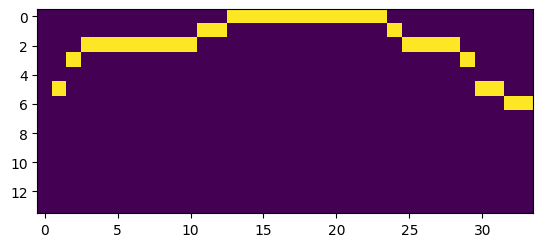

In [33]:
plt.imshow(left_hand_edge_layout)

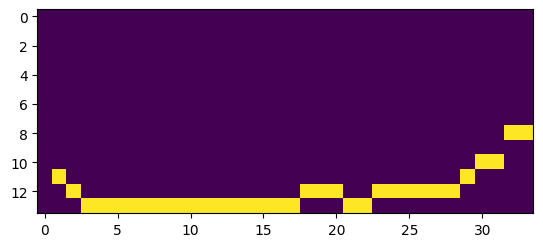

In [10]:
plt.imshow(right_hand_edge_layout)

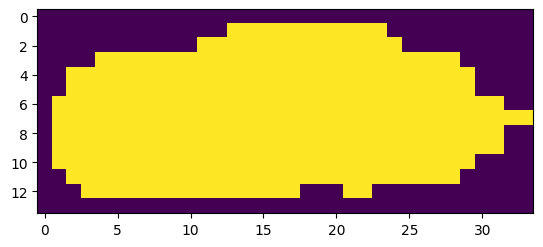

In [107]:
plt.imshow(inboard_layout)

In [ ]:
#plt.imshow(sample_layout)

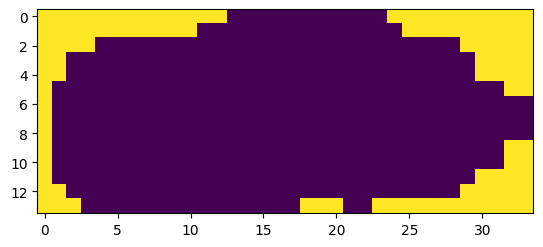

In [108]:
plt.imshow(black_layout)

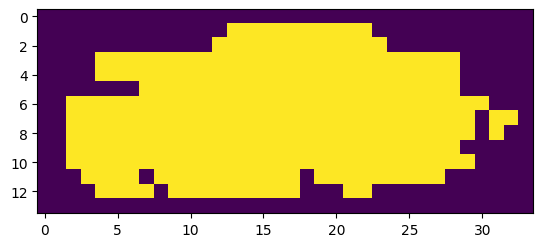

In [37]:
plt.imshow(grid_layout)

In [ ]:
testing_mask_set = []
testing_mask_set.append(black_masks[right_hand_edge_numbers])
testing_mask_set.append(plag_masks[right_hand_edge_numbers])
testing_mask_set.append(bright_masks[right_hand_edge_numbers])
testing_mask_set = np.array(testing_mask_set)
bigger_testing_mask_set = testing_mask_set.copy()
#deSnowed_testing_set = deSnow_masks(testing_mask_set, [0,1,2,3], [0,1,2,3], 2, 3, 2, 4, True)
#bigger_window_test = deSnow_masks(bigger_testing_mask_set, 2, 5, 4, 11, True)

In [ ]:
plt.imshow(ims_downscaled_array[right_hand_edge_numbers[19]]*(deSnowed_testing_set[2,19]))

In [ ]:
plt.imshow(ims_downscaled_array[right_hand_edge_numbers[19]]*(bigger_window_test[2,19]))

In [ ]:
plt.imshow(ims_downscaled_array[right_hand_edge_numbers[19]]*bright_masks[right_hand_edge_numbers[19]])

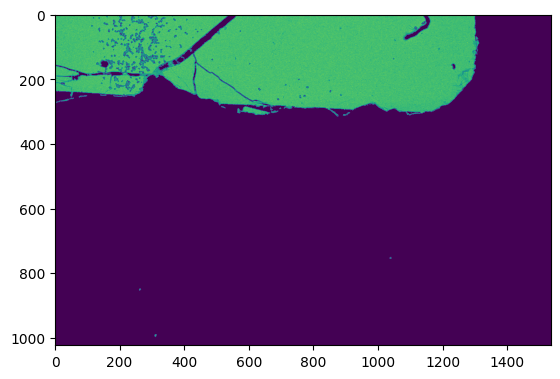

In [12]:
show_me = 32
plt.imshow(ims_downscaled_array[right_hand_edge_numbers[show_me]]*plag_masks[right_hand_edge_numbers[show_me]])

In [ ]:
plt.imshow(ims_downscaled_array[right_hand_edge_numbers[7]]*(processed_mask))

In [ ]:
plt.imshow(ims_downscaled_array[right_hand_edge_numbers[7]]*deSnowed_bright_mask)

In [ ]:
plt.imshow((ims_downscaled_array[right_hand_edge_numbers[7]]*two_step)[0:200,0:200])

In [ ]:
plt.imshow((ims_downscaled_array[right_hand_edge_numbers[7]]*single_step)[0:200,0:200])

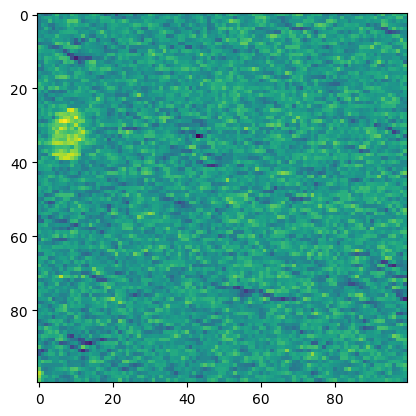

In [13]:
plt.imshow((ims_downscaled_array[right_hand_edge_numbers[7]]*(plag_masks[right_hand_edge_numbers[7]]+bright_masks[right_hand_edge_numbers[7]]))[100:200,100:200])

In [32]:
testingblack_masks, testingplag_masks, testingbright_masks = deSnow_masks(original_mask_set[:,right_hand_edge_numbers[0:10],:,:], [0,1,2], [0,1,2], 6, 6, 8, 16)

(3, 10, 1024, 1536)
Doing repeat  0


C:\Users\rwfbl\AppData\Local\Temp\ipykernel_14928\3290097019.py:1: UserWarning: Possible precision loss converting image of type int32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  testingblack_masks, testingplag_masks, testingbright_masks = deSnow_masks(original_mask_set[:,right_hand_edge_numbers[0:10],:,:], [0,1,2], [0,1,2], 6, 6, 8, 16)


Doing repeat  1
Doing repeat  2
Doing repeat  3
Doing repeat  4
Doing repeat  5


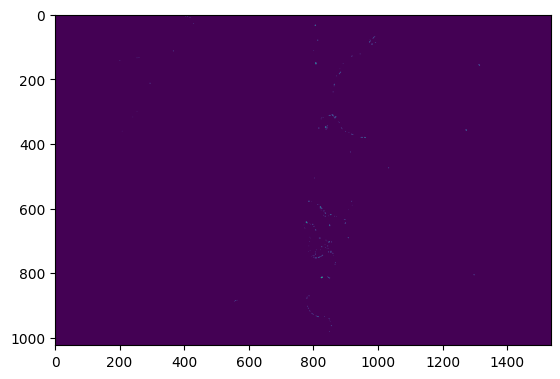

In [39]:
plt.imshow((ims_downscaled_array[right_hand_edge_numbers[8]]*testingblack_masks[8]))

In [21]:
bright_masks = 0
plag_masks = 0
black_masks = 0
gc.collect()

572

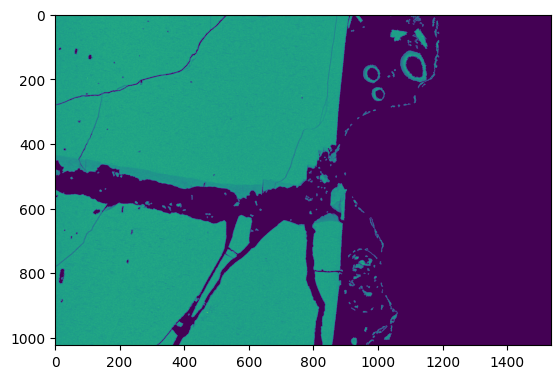

In [16]:
plt.imshow(ims_downscaled_array[right_hand_edge_numbers[7]]*plag_masks[right_hand_edge_numbers[7]])

In [ ]:
np.mean(ims_downscaled_array[grid_numbers[3]][plag_masks[grid_numbers[3]]])

In [ ]:
130*(1-plag_masks[grid_numbers[3]])

In [ ]:
plt.imshow(ims_downscaled_array[grid_numbers[3]]*(1-plag_masks[grid_numbers[3]]))

In [ ]:
plt.imshow(ims_downscaled_array[grid_numbers[3]])

In [14]:
#Take the tiles, threshold them, denoise them, unthreshold them, then replace the original plag pixels with them (the thresholding and unthresholding is to give the denoiser more contrast and therefore better signal-noise ratio)

ims_denoised = []
for i in range(len(ims_downscaled_array)):
#for i in grid_tile_numbers[2:3]:
    thresholded = ims_downscaled_array[i].copy()
    print(np.mean(thresholded[plag_masks[i]]))
    print(np.mean(thresholded[bright_masks[i]]))
    #trying masking before denoising so I can more aggressively denoise but preserve edges
    thresholded = (thresholded*plag_masks[i]) + (np.mean(thresholded[plag_masks[i]])*(1-plag_masks[i]))
    print(np.mean(thresholded))


    #This process seems to increase the contrast across the final thing, even though it shouldn't
    #26/04/24 trying without this as new denoising does not reduce resolution like the mean bilat and tv variants did
    #thresholded[thresholded>bright_threshold] = bright_threshold
    #thresholded[thresholded<black_threshold] = black_threshold
    #thresholded = (thresholded - black_threshold)*(256/(bright_threshold-black_threshold))

    
    #26/04/24 trying order 4 cutoff freq 0.3 npad 16 // was not enough
    #26/04/24 order 6 freq 0.1 npad 16, hopefully will be very aggressive
    #30/04/24 testing only half downscaled images order 2 freq 0.02 npad 128, thinking being that this could hopefully produce things smooth enough that the blobs merge into zones, but may be overzealous
    de_noised_butter = skimage.filters.butterworth(thresholded, cutoff_frequency_ratio=0.02, high_pass=False, order=2.0, channel_axis=None, npad = 128)
    print(np.mean(de_noised_butter))
    un_thresholded = de_noised_butter #((de_noised_butter/256)*(bright_threshold-black_threshold))+black_threshold
    #plt.imshow(un_thresholded)
    #print(np.mean(un_thresholded))
    recombined = ims_downscaled_array[i].copy()
    recombined[plag_masks[i]] = un_thresholded[plag_masks[i]]
    #recombined = recombined*(1-bright_masks[i])
    #recombined = recombined + (holy_ims_downscaled_array[i]*(bright_masks[i]))
    #recombined = recombined*(1-black_masks[i])
    
    #plt.imshow(replaced)
    
    #print(np.mean(replaced))
    ims_denoised.append(recombined)
    print(i)
ims_denoised = np.array(ims_denoised)
#holy_ims_denoised = ims_denoised.copy()
#ims_downscaled_array = 0

c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


nan
nan
nan
nan
0
nan
nan
nan
nan
1
100.24567
186.2779
100.24566650413423
100.24566568898824
2
101.45462
nan
101.45462036181318
101.4546202174464
3
100.72533
nan
100.72532653957994
100.72532653962496
4
108.43567
169.75194
108.435668945361
108.43566897959461
5
107.98535
nan
107.98535156203918
107.98535485893821
6
112.37559
160.4435
112.37558746312182
112.37555695035587
7
106.282265
176.09572
106.28226470988011
106.28226470980816
8
114.71792
163.16028
114.71791839621922
114.7179183962216
9
108.24485
180.98811
108.24485015818209
108.24483858883957
10
105.3752
nan
105.37519836423355
105.37519834937507
11
103.9249
170.6987
103.92489624020527
103.92489625464681
12
111.06496
169.1819
111.06495666372939
111.06495666364391
13
nan
nan
nan
nan
14
102.71844
158.16786
102.71843719401902
102.71843719400105
15
99.64208
nan
99.64208221415174
99.64208220848631
16
101.89663
nan
101.89662933353004
101.89659366309068
17
105.31506
nan
105.3150634761405
105.31506088962531
18
131.69823
151.43266
131.69822612

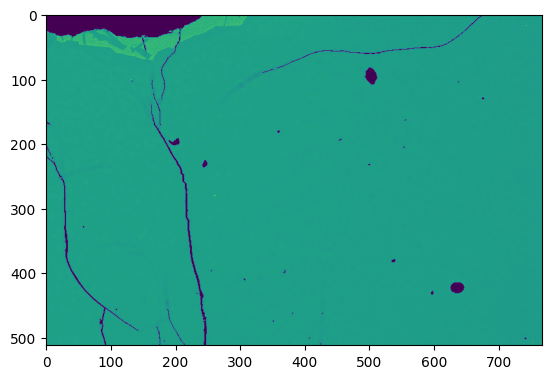

In [111]:
in_question = ims_denoised[36].copy()
plt.imshow(in_question)

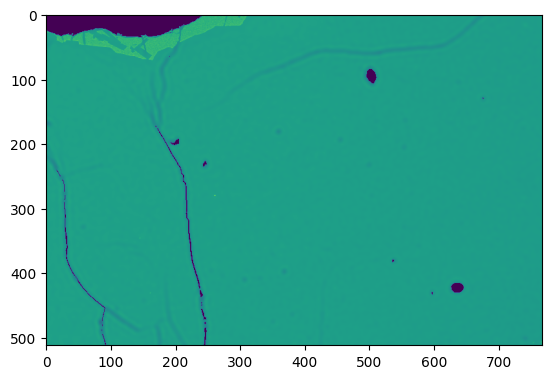

In [83]:
in_question = ims_denoised[0].copy()
plt.imshow(in_question)

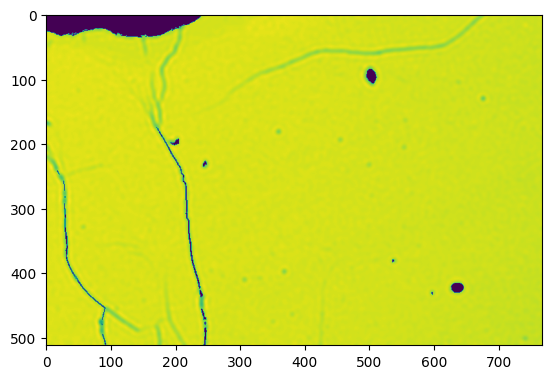

In [65]:
plt.imshow(in_question*(1-black_masks[36]))

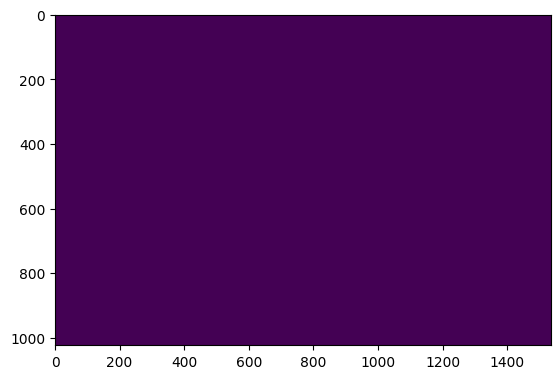

In [15]:
plt.imshow(ims_denoised[0])

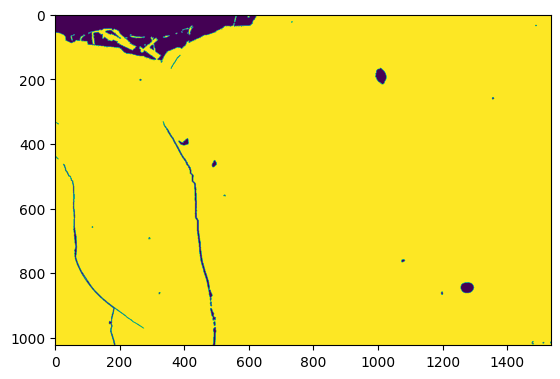

In [16]:
plt.imshow(plag_masks[grid_numbers[2]])

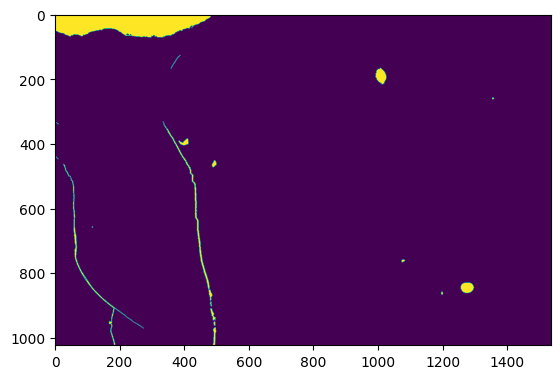

In [17]:
plt.imshow(black_masks[grid_numbers[2]])

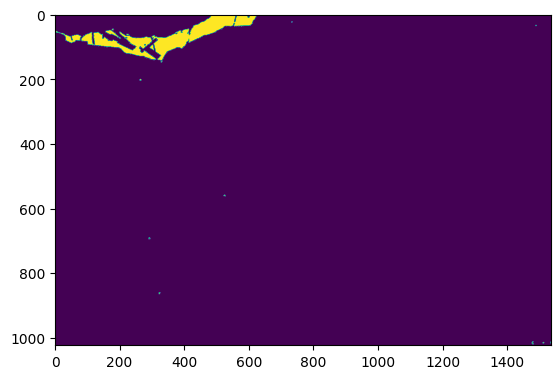

In [61]:
plt.imshow(bright_masks[grid_numbers[2]])

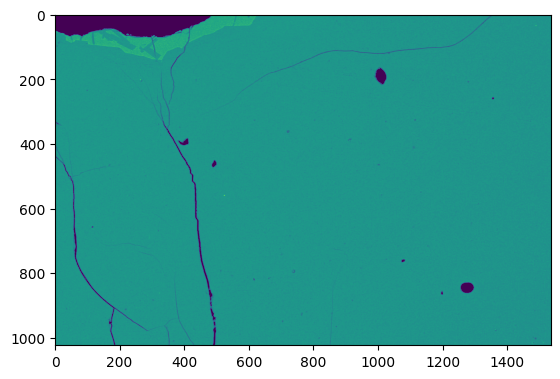

In [62]:
plt.imshow(ims_downscaled_array[grid_numbers[2]])

In [56]:
testing = skimage.filters.butterworth(ims_downscaled_array[grid_numbers[3]], cutoff_frequency_ratio=0.03, high_pass=False, order=2.0, channel_axis=None, npad = 128)
 

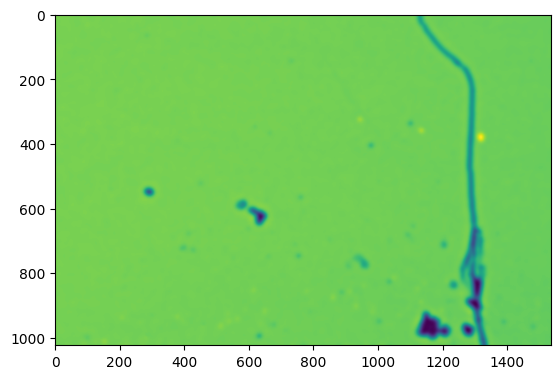

In [57]:
plt.imshow(testing)

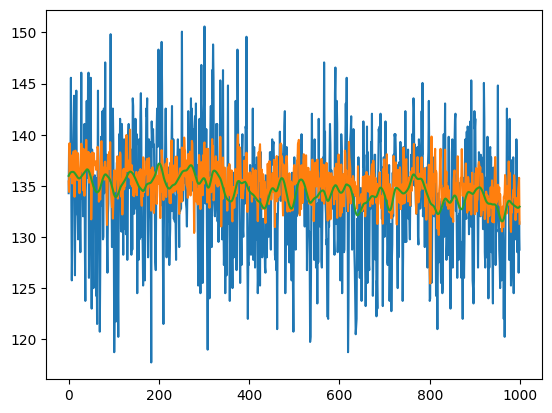

In [58]:
plt.plot(ims_downscaled_array[grid_numbers[3]][0,:1000])
plt.plot(np.mean(ims_downscaled_array[grid_numbers[3]][0:10, :1000], 0))
plt.plot(testing[0,:1000])

In [ ]:

plt.plot(np.mean(ims_downscaled_array[grid_numbers[3]][:,0:50], 1))
plt.plot(np.mean(ims_denoised[grid_numbers[3]][:,0:50], 1))
#plt.plot(np.mean(testing[:,0:50], 1))

In [160]:
ims_denoised = holy_ims_denoised.copy()

0.1549755
-0.22578661
0.030333072
0.011874429
-0.01490146
0.0008787993
0.00091321627
-0.0011274797
2.8996861e-05
3.1102834e-05
-4.9648334e-05
1.2902507e-06


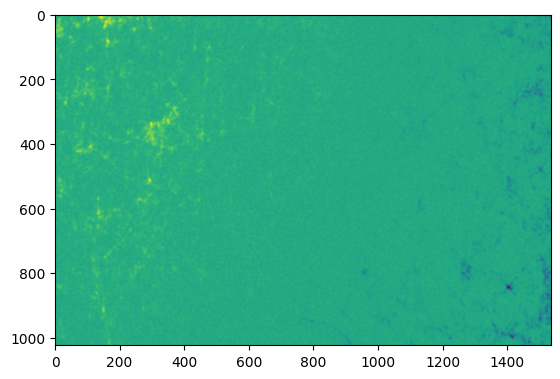

In [64]:
#De-gridder proper
n_degrids = 3
tileset = ims_denoised
for i in range(n_degrids):
    plag_debug = []
    contrasts_for_degrid = []
    for j in grid_numbers:
        plag_values = ims_denoised[j]*plag_masks[j]
        plag_values[plag_values !=0] = plag_values[plag_values !=0]-np.mean(plag_values[plag_values !=0])
        contrasts_for_degrid.append(plag_values)
    contrasts_for_degrid = np.array(contrasts_for_degrid)
    mean_contrast_for_degrid = np.mean(contrasts_for_degrid, 0)
    smoothed_contrast = mean_contrast_for_degrid #skimage.filters.butterworth(mean_contrast_for_degrid, cutoff_frequency_ratio=0.1, high_pass=False, order=4.0, channel_axis=None, npad = 128)
    ims_denoised = ims_denoised - smoothed_contrast
    ims_denoised[(ims_denoised<(np.max(smoothed_contrast)+1))&(ims_denoised>(np.min(smoothed_contrast)-1))] = 0
    print(np.max(smoothed_contrast))
    print(np.min(smoothed_contrast))
    print(np.mean(abs(smoothed_contrast)))

#for testing

for i in range(1):
    plag_debug = []
    contrasts_for_degrid = []
    for j in grid_numbers:
        plag_values = ims_denoised[j]*plag_masks[j]
        plag_values[plag_values !=0] = plag_values[plag_values !=0]-np.mean(plag_values[plag_values !=0])
        contrasts_for_degrid.append(plag_values)
    contrasts_for_degrid = np.array(contrasts_for_degrid)
    mean_contrast_for_degrid = np.mean(contrasts_for_degrid, 0)
    smoothed_contrast = skimage.filters.butterworth(mean_contrast_for_degrid, cutoff_frequency_ratio=0.1, high_pass=False, order=4.0, channel_axis=None, npad = 128)
    

plt.imshow(smoothed_contrast)
print(np.max(smoothed_contrast))
print(np.min(smoothed_contrast))
print(np.mean(abs(smoothed_contrast)))




-8.564135093751467e-07
-8.564135093751467e-07
8.564135093751467e-07
-8.564135093751467e-07
-8.564135093751467e-07
8.564135093751467e-07


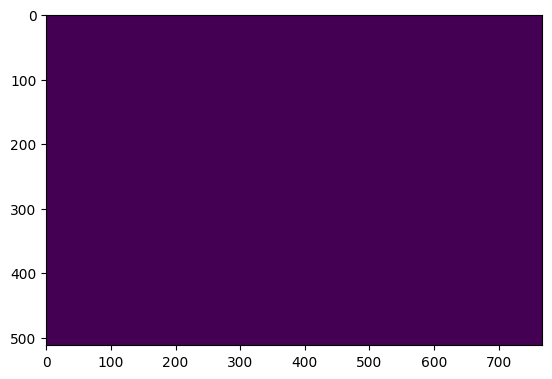

In [156]:
#27/04/24 doesn't work, think it's to do with the nonzero thing


#Right-hand edge remover proper
n_right_edges = 1
tileset = ims_denoised
for i in range(n_right_edges):
    plag_debug = []
    contrasts_for_right_hand = []
    for j in right_hand_edge_numbers:
        plag_values = ims_denoised[j]*plag_masks[j]
        plag_values[plag_values !=0] = plag_values[plag_values !=0]-np.mean(plag_values[plag_values !=0])
        plag_1d = np.mean(plag_values[plag_values !=0], 0)
        plag_2d = np.zeros((512,768))+plag_1d
        contrasts_for_right_hand.append(plag_2d)
    contrasts_for_right_hand = np.array(contrasts_for_right_hand)
    mean_contrast_for_right_hand = np.mean(contrasts_for_right_hand, 0)
    smoothed_contrast = mean_contrast_for_right_hand #skimage.filters.butterworth(mean_contrast_for_degrid, cutoff_frequency_ratio=0.1, high_pass=False, order=4.0, channel_axis=None, npad = 128)
    ims_denoised[right_hand_edge_numbers] = ims_denoised[right_hand_edge_numbers] - smoothed_contrast
    ims_denoised[(ims_denoised<(np.max(smoothed_contrast)+1))&(ims_denoised>(np.min(smoothed_contrast)-1))] = 0
    print(np.max(smoothed_contrast))
    print(np.min(smoothed_contrast))
    print(np.mean(abs(smoothed_contrast)))

contrasts_for_right_hand = []
for j in right_hand_edge_numbers:
    plag_values = ims_denoised[j]*plag_masks[j]
    plag_values[plag_values !=0] = plag_values[plag_values !=0]-np.mean(plag_values[plag_values !=0])
    plag_1d = np.mean(plag_values[plag_values !=0], 0)
    plag_2d = np.zeros((512,768))+plag_1d
    contrasts_for_right_hand.append(plag_2d)
contrasts_for_right_hand = np.array(contrasts_for_right_hand)
mean_contrast_for_right_hand = np.mean(contrasts_for_right_hand, 0)

    

plt.imshow(mean_contrast_for_right_hand)
print(np.max(mean_contrast_for_right_hand))
print(np.min(mean_contrast_for_right_hand))
print(np.mean(abs(mean_contrast_for_right_hand)))

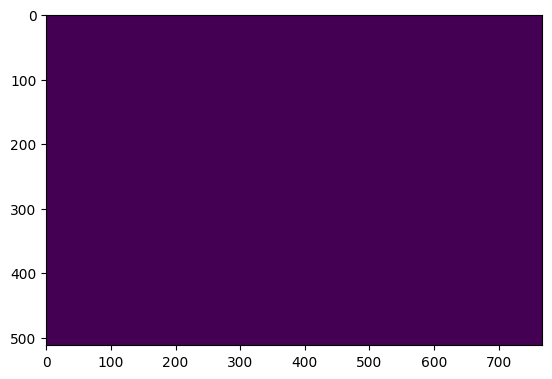

In [158]:
plt.imshow(plag_2d)

In [159]:
plag_2d

array([[7.33502816e-07, 7.33502816e-07, 7.33502816e-07, ...,
        7.33502816e-07, 7.33502816e-07, 7.33502816e-07],
       [7.33502816e-07, 7.33502816e-07, 7.33502816e-07, ...,
        7.33502816e-07, 7.33502816e-07, 7.33502816e-07],
       [7.33502816e-07, 7.33502816e-07, 7.33502816e-07, ...,
        7.33502816e-07, 7.33502816e-07, 7.33502816e-07],
       ...,
       [7.33502816e-07, 7.33502816e-07, 7.33502816e-07, ...,
        7.33502816e-07, 7.33502816e-07, 7.33502816e-07],
       [7.33502816e-07, 7.33502816e-07, 7.33502816e-07, ...,
        7.33502816e-07, 7.33502816e-07, 7.33502816e-07],
       [7.33502816e-07, 7.33502816e-07, 7.33502816e-07, ...,
        7.33502816e-07, 7.33502816e-07, 7.33502816e-07]])

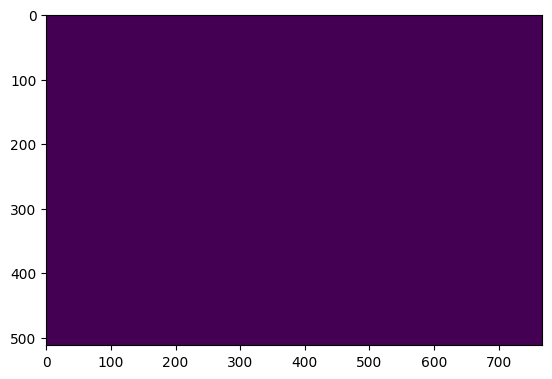

In [157]:
plt.imshow(smoothed_contrast)

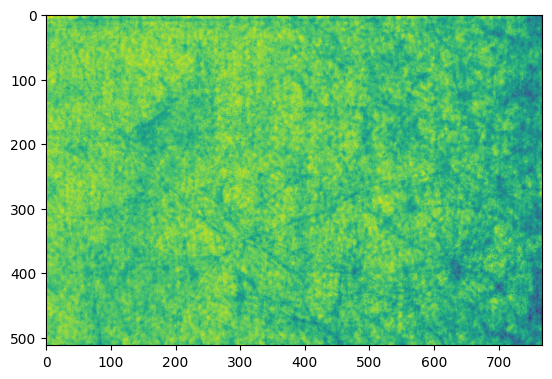

In [144]:
plt.imshow(mean_contrast_for_degrid)

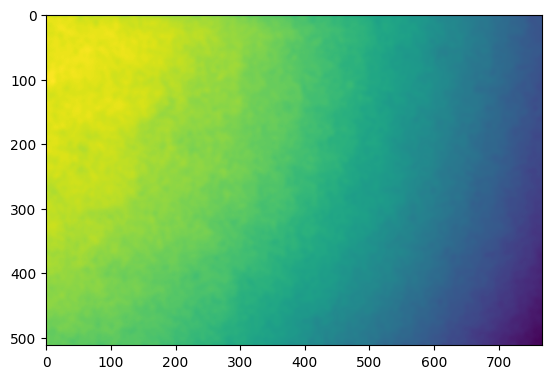

In [129]:
#prior to degrid
plt.imshow(smoothed_contrast)

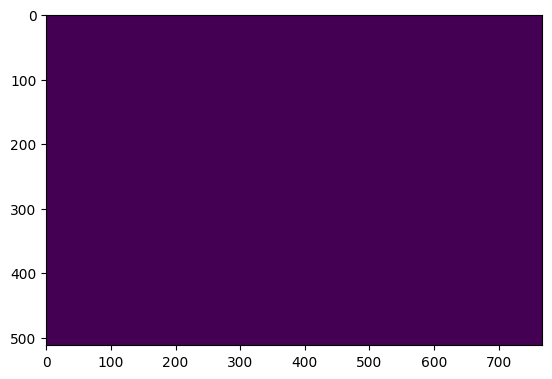

In [122]:
plt.imshow(plag_debug[52])

In [ ]:
#Take the inboard tiles and replace their dark areas with random values from their distribution of other values
inboard_downscaled_masked = []
for i in grid_numbers:
    sample_values = ims_denoised[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
    sample_mean = np.mean(sample_values[sample_values>1])
    #sample_deviation = np.std(sample_values[sample_values>1])
    fitting_array = (1-plag_masks[i])*sample_mean#np.random.normal(sample_mean, sample_deviation, ims_denoised[i].shape) #Make an array 
    
    inboard_downscaled_masked.append((fitting_array+sample_values))
    #print(sample_mean, sample_deviation)
inboard_downscaled_masked = np.array(inboard_downscaled_masked)

In [ ]:
#plt.imshow(np.mean(inboard_downscaled_masked,0).reshape(512,768))
print(np.max(np.mean(inboard_downscaled_masked,0)) - np.min(np.mean(inboard_downscaled_masked,0)))
smoothed_mean = skimage.filters.butterworth(np.mean(inboard_downscaled_masked,0).reshape(512,768), cutoff_frequency_ratio=0.05, high_pass=False, order=1.0, channel_axis=None, npad = 64)
print(np.max(smoothed_mean) - np.min(np.mean(inboard_downscaled_masked,0)))
                                   
#plt.imshow(np.mean(inboard_downscaled_masked,0).reshape(512,768)-smoothed_mean)
#plt.imshow(smoothed_mean)
#plt.imshow(np.mean(inboard_downscaled_masked,0))
#thing = np.mean(inboard_downscaled_masked,0).reshape(512,768)-smoothed_mean

In [ ]:
#Do the primary/first order de-gridding

#This is the version of the processing which only took into account the mean of inboard tiles

mean_contrast = np.mean(inboard_downscaled_masked,0) - np.mean(inboard_downscaled_masked)
mean_contrast_smoothed = skimage.filters.butterworth(mean_contrast, cutoff_frequency_ratio=0.05, high_pass=False, order=1.0, channel_axis=None, npad = 32)

mean_subtracted = ims_denoised-mean_contrast_smoothed

In [ ]:
#plt.imshow(holy_ims_denoised[grid_numbers[7]]*plag_masks[grid_numbers[7]]-inboard_degridded_remasked[7]*plag_masks[grid_numbers[7]])

In [ ]:
#Take the inboard tiles and replace their dark areas with random values from their distribution of other values again
inboard_downscaled_remasked = []
for i in grid_numbers:
    sample_values = mean_subtracted[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
    sample_mean = np.mean(sample_values[sample_values>1])
    #sample_deviation = np.std(sample_values[sample_values>1])
    fitting_array = (1-plag_masks[i])*sample_mean#np.random.normal(sample_mean, sample_deviation, ims_denoised[i].shape) #Make an array 
    
    inboard_downscaled_remasked.append((fitting_array+sample_values))
    #print(sample_mean, sample_deviation)
inboard_degridded_remasked = np.array(inboard_downscaled_remasked)

In [ ]:
plt.imshow(np.mean(inboard_degridded_remasked,0).reshape(512,768))
print(np.max(np.mean(inboard_degridded_remasked,0)) - np.min(np.mean(inboard_degridded_remasked,0)))

In [ ]:
#Do the second order de-gridding

#This is the version of the processing which only took into account the mean of inboard tiles

mean_contrast = np.mean(inboard_downscaled_remasked,0).reshape(512,768) - np.mean(np.mean(inboard_downscaled_remasked,0))
mean_contrast_smoothed = skimage.filters.butterworth(mean_contrast, cutoff_frequency_ratio=0.05, high_pass=False, order=1.0, channel_axis=None, npad = 32)

double_degridded = mean_subtracted-mean_contrast_smoothed
plt.imshow(mean_contrast_smoothed)

In [ ]:
#Take the inboard tiles and replace their dark areas with random values from their distribution of other values again
inboard_downscaled_reremasked = []
for i in grid_numbers:
    sample_values = double_degridded[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
    sample_mean = np.mean(sample_values[sample_values>1])
    #print(i, sample_mean)
    #sample_deviation = np.std(sample_values[sample_values>1])
    fitting_array = (1-plag_masks[i])*sample_mean#np.random.normal(sample_mean, sample_deviation, ims_denoised[i].shape) #Make an array 
    inboard_downscaled_reremasked.append((fitting_array+sample_values).flatten())
    #print(sample_mean, sample_deviation)
inboard_degridded_reremasked = np.array(inboard_downscaled_reremasked)

In [ ]:
plt.imshow(np.mean(inboard_degridded_reremasked,0).reshape(512,768))
print(np.max(np.mean(inboard_degridded_reremasked,0)) - np.min(np.mean(inboard_degridded_reremasked,0)))

In [ ]:
thing = np.mean(inboard_degridded_reremasked,0).reshape(512,768)
thing_contrast = thing-np.mean(thing)
print(np.mean(np.abs(thing_contrast)))
print(np.mean(thing[:, 0:100]))
print(np.mean(thing[:, 650:750]))
print(np.max(thing[:, 0:100]))
print(np.max(thing[:, 650:750]))

In [ ]:
#triple degrid for luck
mean_contrast = np.mean(inboard_downscaled_reremasked,0).reshape(512,768) - np.mean(np.mean(inboard_downscaled_reremasked,0))
mean_contrast_smoothed = skimage.filters.butterworth(mean_contrast, cutoff_frequency_ratio=0.05, high_pass=False, order=1.0, channel_axis=None, npad = 32)

triple_degridded = double_degridded-mean_contrast_smoothed

In [ ]:
#Take the inboard tiles and replace their dark areas with random values from their distribution of other values again again
inboard_downscaled_rereremasked = []
for i in grid_numbers:
    sample_values = triple_degridded[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
    sample_mean = np.mean(sample_values[sample_values>1])
    #sample_deviation = np.std(sample_values[sample_values>1])
    fitting_array = (1-plag_masks[i])*sample_mean#np.random.normal(sample_mean, sample_deviation, ims_downscaled_array[i].shape) #Make an array 
    
    inboard_downscaled_rereremasked.append((fitting_array+sample_values))
    #print(sample_mean, sample_deviation)
inboard_degridded_rereremasked = np.array(inboard_downscaled_rereremasked)

In [ ]:
#plt.imshow(np.mean(inboard_degridded_rereremasked,0).reshape(512,768))
#plt.imshow(skimage.filters.butterworth(np.mean(inboard_degridded_rereremasked,0), cutoff_frequency_ratio=0.05, high_pass=False, order=1.0, channel_axis=None, npad = 32))
print(np.max(np.mean(inboard_degridded_rereremasked,0)) - np.min(np.mean(inboard_degridded_rereremasked,0)))

In [ ]:
thing = np.mean(inboard_degridded_rereremasked,0).reshape(512,768)
thing_contrast = thing-np.mean(thing)
print(np.mean(np.abs(thing_contrast)))
print(np.mean(thing[:, 0:100]))
print(np.mean(thing[:, 650:750]))
print(np.max(thing[:, 0:100]))
print(np.max(thing[:, 650:750]))

In [ ]:
#quadruple degrid for luck
mean_contrast = np.mean(inboard_downscaled_rereremasked,0).reshape(512,768) - np.mean(np.mean(inboard_downscaled_rereremasked,0))
mean_contrast_smoothed = skimage.filters.butterworth(mean_contrast, cutoff_frequency_ratio=0.05, high_pass=False, order=1.0, channel_axis=None, npad = 32)

quad_degridded = triple_degridded-mean_contrast_smoothed

In [ ]:
gc.collect()

In [ ]:
#Take the inboard tiles and replace their dark areas with random values from their distribution of other values again again
inboard_downscaled_rerereremasked = []
for i in grid_numbers:
    sample_values = quad_degridded[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
    sample_mean = np.mean(sample_values[sample_values>1])
    #sample_deviation = np.std(sample_values[sample_values>1])
    fitting_array = (1-plag_masks[i])*sample_mean#np.random.normal(sample_mean, sample_deviation, plag_masks[i].shape) #Make an array 
    
    inboard_downscaled_rerereremasked.append((fitting_array+sample_values))
    #print(sample_mean, sample_deviation)
inboard_degridded_rerereremasked = np.array(inboard_downscaled_rerereremasked)

In [ ]:
plt.imshow(np.mean(inboard_degridded_rerereremasked,0).reshape(512,768))
print(np.max(np.mean(inboard_degridded_rerereremasked,0)) - np.min(np.mean(inboard_degridded_rerereremasked,0)))

In [ ]:
thing = np.mean(inboard_degridded_rerereremasked,0).reshape(512,768)
thing_contrast = thing-np.mean(thing)
print(np.mean(np.abs(thing_contrast)))
print(np.mean(thing[:, 0:100]))
print(np.mean(thing[:, 650:750]))
print(np.max(thing[:, 0:100]))
print(np.max(thing[:, 650:750]))

In [ ]:
#quintuple degrid for luck
mean_contrast = np.mean(inboard_downscaled_rerereremasked,0).reshape(512,768) - np.mean(np.mean(inboard_downscaled_rerereremasked,0))
mean_contrast_smoothed = skimage.filters.butterworth(mean_contrast, cutoff_frequency_ratio=0.05, high_pass=False, order=1.0, channel_axis=None, npad = 32)

quin_degridded = quad_degridded-mean_contrast_smoothed

In [ ]:
#Take the inboard tiles and replace their dark areas with random values from their distribution of other values again again
inboard_downscaled_5masked = []
for i in grid_numbers:
    sample_values = quin_degridded[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
    sample_mean = np.mean(sample_values[sample_values>1])
    #sample_deviation = np.std(sample_values[sample_values>1])
    fitting_array = (1-plag_masks[i])*sample_mean#np.random.normal(sample_mean, sample_deviation, plag_masks[i].shape) #Make an array 
    
    inboard_downscaled_5masked.append((fitting_array+sample_values))
    #print(sample_mean, sample_deviation)
inboard_degridded_5masked = np.array(inboard_downscaled_5masked)

In [ ]:
plt.imshow(np.mean(inboard_degridded_5masked,0).reshape(512,768))
print(np.max(np.mean(inboard_degridded_5masked,0)) - np.min(np.mean(inboard_degridded_5masked,0)))
thing = np.mean(inboard_degridded_5masked,0).reshape(512,768)
thing_contrast = thing-np.mean(thing)
print(np.mean(np.abs(thing_contrast)))
print(np.mean(thing[:, 0:100]))
print(np.mean(thing[:, 650:750]))
print(np.max(thing[:, 0:100]))
print(np.max(thing[:, 650:750]))

In [ ]:
#Take the edge tiles and replace their dark areas with random values from their distribution of other values again
edge_downscaled_remasked = []
for i in right_hand_edge_numbers:
    sample_values = quin_degridded[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
    sample_mean = np.mean(sample_values[sample_values>1])
    #sample_deviation = 0# np.std(sample_values[sample_values>1])
    fitting_array = (1-plag_masks[i])*sample_mean#np.random.normal(sample_mean, sample_deviation, plag_masks[i].shape) #Make an array 
    
    edge_downscaled_remasked.append((fitting_array+sample_values))
    #print(sample_mean, sample_deviation)
edge_degridded_remasked = np.array(edge_downscaled_remasked)

In [ ]:
#plt.imshow(np.mean(ims_downscaled_array[right_hand_edge_numbers], 0))

In [ ]:
#plt.imshow(np.mean(ims_downscaled_array[right_hand_edge_numbers]).reshape(512,768))

In [ ]:
plt.imshow(np.mean(edge_degridded_remasked,0))
print(np.max(np.mean(edge_degridded_remasked,0)) - np.min(np.mean(edge_degridded_remasked,0)))

In [ ]:
edge_sequence = np.mean(np.mean(edge_degridded_remasked,0), 0)-np.mean(edge_degridded_remasked)
w = 100
rolling_average = np.convolve(edge_sequence, np.ones(w), "valid") / w
plt.plot(np.arange(w, 769, 1), rolling_average,)
plt.plot(edge_sequence)

In [ ]:
import numpy as np
from scipy.signal import butter,filtfilt
# Filter requirements.
T = 192        # Sample Period
fs = 3     # sample rate, Hz
cutoff = 0.02     # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y
# Filter the data, and plot both the original and filtered signals.
cutoff = 0.004
hard = butter_lowpass_filter(edge_sequence[100::], cutoff, fs, order)
hard = hard- np.mean(hard[-50::])
cutoff = 0.045
soft = butter_lowpass_filter(edge_sequence, cutoff, fs, order)
soft[100::] = hard
plt.plot(edge_sequence)
plt.plot(soft)

In [ ]:

first_transition_point = 50
second_transition_point = 200
hard_cutoff = 0.01
med_cutoff = 0.03
soft_cutoff = 0.1
hard = butter_lowpass_filter(edge_sequence[second_transition_point::], hard_cutoff, fs, order)
#hard = hard- np.mean(hard[-50::])
med = butter_lowpass_filter(edge_sequence, med_cutoff, fs, order)
soft = butter_lowpass_filter(edge_sequence, soft_cutoff, fs, order)
soft[first_transition_point::] = med[first_transition_point::]
soft[second_transition_point::] = hard
first_transition_width = 5
second_transition_width = 15
pre_transition = soft[first_transition_point-first_transition_width]
post_transition = soft[first_transition_point+first_transition_width]
for i in range(2*first_transition_width):
    soft[first_transition_point-first_transition_width+i] = (post_transition*i + pre_transition*(2*first_transition_width -i))/(2*first_transition_width)
pre_transition = soft[second_transition_point-second_transition_width]
post_transition = soft[second_transition_point+second_transition_width]
for i in range(2*second_transition_width):
    soft[second_transition_point-second_transition_width+i] = (post_transition*i + pre_transition*(2*second_transition_width -i))/(2*second_transition_width)


edge_feature_smoothed = soft
plt.plot(edge_sequence)
plt.plot(edge_feature_smoothed)

In [ ]:
#plt.plot(edge_sequence[0:20])

In [ ]:
np.argwhere(edge_sequence== np.max(edge_sequence))

In [ ]:
old_edge_feature = edge_sequence.copy()
old_edge_feature_smooth = edge_feature_smoothed.copy()


In [ ]:
np.max(edge_feature_smoothed)

In [ ]:
#Do the removal of the edge feature

edge_feature_smoothed_tile = np.zeros((512,768))+edge_feature_smoothed
mean_contrast = edge_feature_smoothed_tile
double_degridded_barred = quin_degridded.copy()
#before_change = quad_degridded.copy()
double_degridded_barred[right_hand_edge_numbers] = double_degridded_barred[right_hand_edge_numbers] - mean_contrast

In [ ]:
plt.imshow(mean_contrast)

In [ ]:
mean_contrast

In [ ]:
#Take the edge tiles and replace their dark areas with random values from their distribution of other values again, again
edge_downscaled_reremasked = []
for i in right_hand_edge_numbers:
    sample_values = double_degridded_barred[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
    sample_mean = np.mean(sample_values[sample_values>1])
    #sample_deviation = 0 #np.std(sample_values[sample_values>1])
    fitting_array = (1-plag_masks[i])*sample_mean#np.random.normal(sample_mean, sample_deviation, plag_masks[i].shape) #Make an array 
    
    edge_downscaled_reremasked.append((fitting_array+sample_values))
    #print(sample_mean, sample_deviation)
edge_degridded_reremasked = np.array(edge_downscaled_reremasked)

In [ ]:
np.mean(edge_degridded_reremasked, 0).shape

In [ ]:
plt.imshow(np.mean(edge_degridded_remasked, 0).reshape(512,768)-np.mean(edge_degridded_reremasked, 0).reshape(512,768))

In [ ]:
plt.imshow(np.mean(edge_degridded_reremasked, 0).reshape(512,768))
print(np.max(np.mean(edge_degridded_reremasked,0)) - np.min(np.mean(edge_degridded_reremasked,0)))

In [ ]:
edge_sequence = np.mean(np.mean(edge_degridded_reremasked,0).reshape(512,768), 0)-np.mean(edge_degridded_reremasked)
w = 100
#rolling_average = np.convolve(edge_sequence, np.ones(w), "valid") / w
#plt.plot(np.arange(w, 769, 1), rolling_average,)
plt.plot(edge_sequence)
plt.plot(old_edge_feature)

In [ ]:
first_transition_point = 50
second_transition_point = 200
hard_cutoff = 0.01
med_cutoff = 0.03
soft_cutoff = 0.1
hard = butter_lowpass_filter(edge_sequence[second_transition_point::], hard_cutoff, fs, order)
#hard = hard- np.mean(hard[-50::])
med = butter_lowpass_filter(edge_sequence, med_cutoff, fs, order)
soft = butter_lowpass_filter(edge_sequence, soft_cutoff, fs, order)
soft[first_transition_point::] = med[first_transition_point::]
soft[second_transition_point::] = hard
first_transition_width = 5
second_transition_width = 15
pre_transition = soft[first_transition_point-first_transition_width]
post_transition = soft[first_transition_point+first_transition_width]
for i in range(2*first_transition_width):
    soft[first_transition_point-first_transition_width+i] = (post_transition*i + pre_transition*(2*first_transition_width -i))/(2*first_transition_width)
pre_transition = soft[second_transition_point-second_transition_width]
post_transition = soft[second_transition_point+second_transition_width]
for i in range(2*second_transition_width):
    soft[second_transition_point-second_transition_width+i] = (post_transition*i + pre_transition*(2*second_transition_width -i))/(2*second_transition_width)


edge_feature_smoothed = soft
plt.plot(edge_sequence)
plt.plot(edge_feature_smoothed)

In [ ]:
#Remove the most anomalous values on the left edge 
#for i in right_hand_edge_numbers:
#    print(i)
#    for j in 512:
#        double_degridded_barred[i, j, 0:10] = np.mean(double_degridded_barred[i, j, 10:20])

In [ ]:
#Checking the anomalous removal worked
#edge_downscaled_rereremasked = []
#for i in right_hand_edge_numbers:
#    sample_values = double_degridded_barred[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
#    sample_mean = np.mean(sample_values[sample_values>1])
#    #sample_deviation = 0 #np.std(sample_values[sample_values>1])
#    fitting_array = (1-plag_masks[i])*sample_mean#np.random.normal(sample_mean, sample_deviation, plag_masks[i].shape) #Make an array 
#    
#    edge_downscaled_reremasked.append((fitting_array+sample_values).flatten())
#    #print(sample_mean, sample_deviation)
#edge_degridded_rereremasked = np.array(edge_downscaled_rereremasked)

In [ ]:
input_tiles = double_degridded_barred

In [ ]:
#Use new filtering method to remove right hand edge effect
number_of_repeats = 5
edge_sequences_set = []
edge_sequences_set_smooth = []

for j in range(number_of_repeats):
    
    edges_many_masked = []
    for i in right_hand_edge_numbers:
        sample_values = input_tiles[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
        sample_mean = np.mean(sample_values[sample_values>1])
        fitting_array = (1-plag_masks[i])*sample_mean #Make an array 
        
        edges_many_masked.append((fitting_array+sample_values))
        #print(sample_mean, sample_deviation)
    edges_many_masked = np.array(edges_many_masked)
    edge_sequence = np.mean(np.mean(edges_many_masked,0), 0)-np.mean(edges_many_masked)
    
    first_transition_point = 50
    second_transition_point = 200
    hard_cutoff = 0.01
    med_cutoff = 0.02
    soft_cutoff = 0.05
    hard = butter_lowpass_filter(edge_sequence[second_transition_point::], hard_cutoff, fs, order)
    #hard = hard- np.mean(hard[-50::])
    med = butter_lowpass_filter(edge_sequence, med_cutoff, fs, order)
    soft = butter_lowpass_filter(edge_sequence, soft_cutoff, fs, order)
    soft[first_transition_point::] = med[first_transition_point::]
    soft[second_transition_point::] = hard
    first_transition_width = 5
    second_transition_width = 25
    pre_transition = soft[first_transition_point-first_transition_width]
    post_transition = soft[first_transition_point+first_transition_width]
    for i in range(2*first_transition_width):
        soft[first_transition_point-first_transition_width+i] = (post_transition*i + pre_transition*(2*first_transition_width -i))/(2*first_transition_width)
    pre_transition = soft[second_transition_point-second_transition_width]
    post_transition = soft[second_transition_point+second_transition_width]
    for i in range(2*second_transition_width):
        soft[second_transition_point-second_transition_width+i] = (post_transition*i + pre_transition*(2*second_transition_width -i))/(2*second_transition_width)


    edge_feature_smoothed = soft
    edge_sequences_set_smooth.append(edge_feature_smoothed)
    edge_sequences_set.append(edge_sequence)
    edge_feature_smoothed_tile = np.zeros((512,768))+edge_feature_smoothed
    mean_contrast = edge_feature_smoothed_tile
    input_tiles[right_hand_edge_numbers] = input_tiles[right_hand_edge_numbers] - mean_contrast*plag_masks[right_hand_edge_numbers]
    #contrast_metric = np.max(np.mean(edges_many_masked,0)) - np.min(np.mean(edges_many_masked,0))
    #print(contrast_metric)
iteratively_processed = input_tiles
plt.plot(edge_sequence)
plt.plot(edge_feature_smoothed)

In [ ]:
#Do the removal of the edge feature

mean_contrast = np.mean(edge_degridded_reremasked,0).reshape(512,768) - np.mean(np.mean(edge_degridded_reremasked,0))
double_degridded_double_barred = double_degridded_barred
double_degridded_double_barred[edge_tile_numbers] = double_degridded_barred[edge_tile_numbers] - mean_contrast

In [ ]:
#Take the edge tiles and replace their dark areas with random values from their distribution of other values again, again
edge_downscaled_rereremasked = []
for i in edge_tile_numbers:
    sample_values = double_degridded_double_barred[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
    sample_mean = np.mean(sample_values[sample_values>1])
    sample_deviation = np.std(sample_values[sample_values>1])
    fitting_array = (1-plag_masks[i])*np.random.normal(sample_mean, sample_deviation, plag_masks[i].shape) #Make an array 
    
    edge_downscaled_rereremasked.append((fitting_array+sample_values).flatten())
    #print(sample_mean, sample_deviation)
edge_degridded_rereremasked = np.array(edge_downscaled_rereremasked)

In [ ]:
plt.imshow(np.mean(edge_degridded_rereremasked,0).reshape(512,768))
print(np.max(np.mean(edge_degridded_rereremasked,0)) - np.min(np.mean(edge_degridded_rereremasked,0)))

In [ ]:
#Do the removal of the edge feature

mean_contrast = np.mean(edge_degridded_reremasked,0).reshape(512,768) - np.mean(np.mean(edge_degridded_reremasked,0))
double_degridded_triple_barred = double_degridded_double_barred
double_degridded_triple_barred[edge_tile_numbers] = double_degridded_double_barred[edge_tile_numbers] - mean_contrast

In [ ]:
#Take the edge tiles and replace their dark areas with random values from their distribution of other values again, again
edge_downscaled_rerereremasked = []
for i in edge_tile_numbers:
    sample_values = double_degridded_triple_barred[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
    sample_mean = np.mean(sample_values[sample_values>1])
    sample_deviation = np.std(sample_values[sample_values>1])
    fitting_array = (1-plag_masks[i])*np.random.normal(sample_mean, sample_deviation, plag_masks[i].shape) #Make an array 
    
    edge_downscaled_rerereremasked.append((fitting_array+sample_values).flatten())
    #print(sample_mean, sample_deviation)
edge_degridded_rerereremasked = np.array(edge_downscaled_rerereremasked)

In [ ]:
plt.imshow(np.mean(edge_degridded_rerereremasked,0).reshape(512,768))
print(np.max(np.mean(edge_degridded_rerereremasked,0)) - np.min(np.mean(edge_degridded_rerereremasked,0)))

In [ ]:
contrast_metric = 15
desired_contrast_metric = 1.5
input_tiles = double_degridded_triple_barred.copy()
while contrast_metric > desired_contrast_metric:
#for j in range(1):
    
    edges_many_masked = []
    for i in edge_tile_numbers:
        sample_values = input_tiles[i]*plag_masks[i] #Find all pixel values which are neither too bright nor too dark to be plag
        sample_mean = np.mean(sample_values[sample_values>1])
        sample_deviation = np.std(sample_values[sample_values>1])
        fitting_array = (1-plag_masks[i])*np.random.normal(sample_mean, sample_deviation/5, plag_masks[i].shape) #Make an array 

        edges_many_masked.append((fitting_array+sample_values).flatten())
        #print(sample_mean, sample_deviation)
    edges_many_masked = np.array(edges_many_masked)
    mean_contrast = np.mean(edges_many_masked,0).reshape(512,768) - np.mean(np.mean(edges_many_masked,0))
    input_tiles[edge_tile_numbers] = input_tiles[edge_tile_numbers] - mean_contrast
    contrast_metric = np.max(np.mean(edges_many_masked,0)) - np.min(np.mean(edges_many_masked,0))
    print(contrast_metric)

    
iteratively_processed = input_tiles
plt.imshow(np.mean(iteratively_processed[edge_tile_numbers], 0))


In [162]:
iteratively_processed = ims_denoised

In [163]:
for i in range(vertical_number):
    for j in range(horizontal_number):
        print(i+1,j+1)
        pos_in_list = (horizontal_number*i)+j
        to_save = (iteratively_processed[pos_in_list].reshape(512,768))*256
        to_save = to_save.astype(np.uint16)
        to_save = Image.fromarray(to_save)
        if i>=9 and j>=9:
            thing = 1
            to_save.save('iter_proc_'+str(i+1)+'_'+str(j+1)+'.png')
        elif i<9 and j<9:
            thing = 1
            to_save.save('iter_proc_0'+str(i+1)+'_0'+str(j+1)+'.png')
        elif i<9:
            thing = 1
            to_save.save('iter_proc_0'+str(i+1)+'_'+str(j+1)+'.png')
        elif j <9:
            thing = 1
            to_save.save('iter_proc_'+str(i+1)+'_0'+str(j+1)+'.png')

1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
11 12
11 13
11 14
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
13 12
13 13
13 14
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
14 12
14 13
14 14
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
15 11
15 12
15 13
15 14
1

In [ ]:
#zero the empty space
for i in range(len(ims_denoised)):
    iteratively_processed[i] = iteratively_processed[i]*(plag_masks[i]+bright_masks[i])

Beyond here is experimental/legacy/debugging

In [ ]:
gc.collect()

In [ ]:
np.max(mean_contrast)

In [ ]:
plt.imshow(mean_contrast)

In [ ]:
iteratively_processed.shape

In [ ]:
plt.imshow(iteratively_processed[75])

In [ ]:
plt.imshow(edges_many_masked[3].reshape(512,768))

In [ ]:
np.mean(np.mean(edges_many_masked,0))

In [ ]:
np.mean(iteratively_processed[edge_tile_numbers])

In [ ]:
plt.imshow(np.mean(edges_many_masked, 0).reshape(512,768))

In [ ]:
inboard_and_edge_downscaled_masked = np.append(edge_downscaled_masked, inboard_downscaled_masked, 0)
print(inboard_and_edge_downscaled_masked.shape)
plt.imshow(np.mean(inboard_and_edge_downscaled_masked,0).reshape(512,768))
thing = np.mean(inboard_and_edge_downscaled_masked,0).reshape(512,768)
print(np.mean(thing[:, 0:100]))
print(np.mean(thing[:, 650:750]))
print(np.max(thing[:, 0:100]))
print(np.max(thing[:, 650:750]))

In [ ]:
plt.imshow(np.mean(mean_subtracted[inboard_tile_numbers], 0))

In [ ]:
plt.imshow(mean_subtracted[28].reshape(512,768))

In [ ]:
gradient_check = np.mean(iteratively_processed[inboard_tile_numbers], 0).reshape(512,768)
print(np.mean(gradient_check[0:100, :]))
print(np.mean(gradient_check[400:500, :]))
print(np.mean(gradient_check[:, 0:100]))
print(np.mean(gradient_check[:, 650:750]))
plt.imshow(gradient_check)

In [ ]:
np.max(gradient_check)-np.min(gradient_check)

In [ ]:
are_you_sure = 0
if are_you_sure == 1:
    full_set = pd.Series(ims_downscaled_array.flatten())
    black_example = pd.Series(ims_downscaled[1].flatten())
    plain_example = pd.Series(ims_downscaled[36].flatten())
    bright_example = pd.Series(ims_downscaled[3].flatten())

In [ ]:
#ax = full_set.plot.kde()

In [ ]:
#ax = black_example.plot.kde()

In [ ]:
ax = plain_example.plot.kde(bw_method = 0.01)

In [ ]:
ax = bright_example.plot.kde(bw_method = 0.01)

In [ ]:
pca = PCA(n_components=15)
pca.fit(inboard_downscaled_masked)

In [ ]:
plt.imshow(black_mask_reapplied[35])

In [ ]:
#This reapplies the black and bright pixels

new_processing_approach_tiffs = []


for i in range(len(iteratively_processed)):
    iteratively_processed[i][black_masks[j] == True] = ims_denoised[i][black_masks[j] == True]
    #iteratively_processed[i][bright_masks[j] == True] = ims_denoised[i][bright_masks[j] == True]
    

In [ ]:
plt.imshow(np.mean(iteratively_processed[inboard_tile_numbers], 0))

In [ ]:
#This is the version of the processing which only took into account the mean of inboard tiles
#
#new_processing_approach_tiffs = []
#black_mask_reapplied = []
#
#mean_contrast = pca.mean_.reshape(512,768) - np.mean(pca.mean_)
#mean_subtracted = ims_downscaled_array-mean_contrast
#for i in range(len(ims_downscaled_array)):
#    mean_subtracted_masked = np.zeros(ims_downscaled_array[i].shape)
#    mean_subtracted_masked[black_masks[i] == False] = mean_subtracted[i][black_masks[i] == False]
#    mean_subtracted_masked[black_masks[i] == True] = ims_downscaled_array[i][black_masks[i] == True]
#    black_mask_reapplied.append(mean_subtracted_masked) 
    
    

In [ ]:
ims_downscaled_array[1]

In [ ]:
plt.imshow(np.mean(black_mask_reapplied, 0))

In [ ]:
black_mask_reapplied[2][black_mask_reapplied[2]<2]

In [ ]:
mean_contrast

In [ ]:
#below_cutoff = [] #for old brightness fixing

In [ ]:
#for i in range(len(ims_downscaled[0])):  #for old brightness fixing
#    if ims_downscaled[0][i]<15:
#        below_cutoff.append(ims_downscaled[0][i])

In [ ]:
#below_cutoff

In [ ]:
#(skimage.transform.downscale_local_mean(ims[1], (4,4))).flatten()

In [ ]:
#ims_downscaled_array[13][0] = 255
#to_save = Image.fromarray(ims_downscaled_array[13].reshape(512,768))
#print(to_save)
#to_save.save('tiffnesstest.tif')

In [ ]:
#does_imaging_break_it = Image.fromarray(ims_downscaled_array[14].reshape(512,768))
#does_imaging_break_it = np.array(does_imaging_break_it)
#does_imaging_break_it


In [ ]:
#does_saving_break_it = Image.fromarray(ims_downscaled_array[14].reshape(512,768))
#does_saving_break_it.save('does_saving_break_it.tif')
#beep_boop = plt.imread('does_saving_break_it.tif')
#np.array(beep_boop)

In [ ]:
print(np.mean(ims_downscaled_array[13]))
testing_thresholding = np.array(more_processed_tifs[12])
lower_threshold = 90 *256
upper_threshold = 140 *256
testing_thresholding[testing_thresholding>upper_threshold] = upper_threshold
testing_thresholding[testing_thresholding<lower_threshold] = lower_threshold
plt.imshow(testing_thresholding)
testing_thresholding = testing_thresholding.astype(np.uint16)
testing_thresholding = Image.fromarray(testing_thresholding)
#testing_thresholding.save('1_comps_removed_inboard.png')

In [ ]:
testing_thresholding = np.array(more_processed_tifs[13])
testing_thresholding[testing_thresholding>upper_threshold] = upper_threshold
testing_thresholding[testing_thresholding<lower_threshold] = lower_threshold
plt.imshow(testing_thresholding)

In [ ]:
lower_threshold = 80 *256
upper_threshold = 120 *256
testing_thresholding = np.array(even_more_processed_tifs[12])
testing_thresholding[testing_thresholding>upper_threshold] = upper_threshold
testing_thresholding[testing_thresholding<lower_threshold] = lower_threshold
plt.imshow(testing_thresholding)

In [ ]:
#plt.imshow(Image.fromarray(np.array(processed_tifs[12])-np.array(more_processed_tifs[12])))

In [ ]:
ipca = IncrementalPCA(n_components=15, batch_size=horizontal_number*vertical_number)
ipca_tiffs = ipca.fit_transform(ims_downscaled_array)

In [ ]:
ims_downscaled_array_copy = ims_downscaled_array.copy()
for i in range(len(ims_downscaled_array_copy)):
    mean = np.mean(ims_downscaled_array_copy[i])
    ims_downscaled_array_copy[i][ims_downscaled_array_copy[i]<40] = 120

plt.imshow(ims_downscaled_array_copy[12].reshape(512,768))

In [ ]:
thresholded_ipca = IncrementalPCA(n_components=100, batch_size=horizontal_number*vertical_number)
thresholded_ipca_tifs = thresholded_ipca.fit_transform(ims_downscaled_array_copy)

In [ ]:
#ipca.explained_variance_ratio_
plt.imshow(ipca.mean_.reshape(512,768))

In [ ]:
#Plotting the components next to eachother
fig, axs = plt.subplots(4,4)
#axs[0,0].imshow(thresholded_ipca.mean_.reshape(512,768))
#for i in range(15):
#    axs[np.floor_divide((i+1),4),np.mod((i+1),4)].imshow(thresholded_ipca.components_[i].reshape(512,768))
axs[0,0].imshow(pca.mean_.reshape(512,768))
for i in range(15):
    axs[np.floor_divide((i+1),4),np.mod((i+1),4)].imshow(pca.components_[i].reshape(512,768))
plt.savefig('PCA components.svg', dpi = 500)

In [ ]:
plt.savefig('PCA components for poster.svg', dpi = 500)

In [ ]:
nmf_model = NMF(n_components = 15, init='random', random_state = 0, max_iter = 1000)
nmf_fitted = nmf_model.fit_transform(ims_downscaled_array)
nmf_components = nmf_model.components_

In [ ]:
thresholded_ipca.mean_

In [ ]:
fig, axs = plt.subplots(4,4)
axs[0,0].imshow(ipca.mean_.reshape(512,768))
for i in range(15):
    axs[np.floor_divide((i+1),4),np.mod((i+1),4)].imshow(nmf_components[i].reshape(512,768))
plt.savefig('NMF components for Jmac to see.png', dpi = 500)

In [ ]:
plt.imshow((ipca.mean_.reshape(512,768)))
ipca_tiffs[0]

In [ ]:
for i in range(len(ipca_tiffs)):
    ipca_tiffs[i][0] = 0
    ipca_tiffs[i][1] = 0
    ipca_tiffs[i][2] = 0
    ipca_tiffs[i][3] = 0
component_stripped = ipca.inverse_transform(ipca_tiffs)
plt.imshow(component_stripped[15].reshape(512,768))
to_save = Image.fromarray(component_stripped[15].reshape(512,768))
to_save.save('four_comps_removed_example_pca.png')

In [ ]:
for i in range(len(nmf_fitted)):
    nmf_fitted[i][0] = 0
    nmf_fitted[i][1] = 0
    nmf_fitted[i][2] = 0
    nmf_fitted[i][3] = 0
component_stripped = NMF.inverse_transform(nmf_model, W=nmf_fitted)
plt.imshow(component_stripped[15].reshape(512,768))

In [ ]:


#test = Image.fromarray(ims_downscaled_array[101].reshape(512,768)-ipca.mean_.reshape(512,768))
#plt.imshow(test)

In [ ]:
#plt.imshow(ims_downscaled_array[101].reshape(512,768))

In [ ]:
#test.save('test.tif')

In [ ]:
processed_tifs = []
for i in range(vertical_number):
    for j in range(horizontal_number):
        print(i+1,j+1)
        pos_in_list = (horizontal_number*i)+j
        #brightness_scale_factor = np.mean(ims_downscaled_array[pos_in_list])/np.mean(ims_downscaled_array[pos_in_list]-ipca.mean_)
        #print(brightness_scale_factor)
        #to_save = Image.fromarray(ims_downscaled_array[pos_in_list].reshape(512,768)-ipca.mean_.reshape(512,768))
        mean_subtracted = ims_downscaled_array[pos_in_list]-ipca.mean_
        non_zero_black_count = np.count_nonzero(ims_downscaled_array[pos_in_list] < 15) #Count the number of pixels which are essentially black
        below_cutoff = []
        for l in range(len(ims_downscaled[pos_in_list])):
            if ims_downscaled[pos_in_list][l]<15:
                below_cutoff.append(ims_downscaled[pos_in_list][l])
        if len(below_cutoff)>3000:
            mean_of_the_zeros = np.mean(below_cutoff)
        else:
            mean_of_the_zeros = 10
        
        zero_black_count = len(ims_downscaled_array[pos_in_list])-np.count_nonzero(ims_downscaled_array[pos_in_list])
        black_count = non_zero_black_count + zero_black_count
        
        #print(black_count)
        for k in np.arange(-60,255,1):
            if k <= 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k)
            if k > 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k) + len(mean_subtracted)-np.count_nonzero(mean_subtracted)
            if mean_subtracted_black_pixels > black_count:
                threshold = k-1
                break
        print(threshold)
        
        mean_subtracted[mean_subtracted<threshold] = threshold #replace elements below the threshold with the threshold
        
        #at this point there should be as many threshold values in the processed image as there were zeroes in the original
        
        #Bear in mind that the mean of a "totally black" initial tile is actually still about 10,
        #so I should probably make zero brightness pixels actually 10s to avoid inflating the scale factor
       
        mean_subtracted_zeroed = mean_subtracted - threshold
        
        #Now there should be as many pixels of value 0 as there were pixels of < 15 initially
        
        mean_subtracted_zeroed_mean = np.mean(mean_subtracted_zeroed)
        original_mean = np.mean(ims_downscaled_array[pos_in_list])
        scale_factor = (original_mean-mean_of_the_zeros)/mean_subtracted_zeroed_mean #the 10 is to cope with that essentially being the zero value
        mean_subtracted_zeroed_scaled = (mean_subtracted_zeroed*scale_factor)+mean_of_the_zeros 
    
        #this should result in an image with a lowest value of approximately 10 and the same mean brightness as its original
        
        mean_subtracted_zeroed_scaled[mean_subtracted_zeroed_scaled>255] = 255
        mean_subtracted_zeroed_scaled = mean_subtracted_zeroed_scaled*256
        
        to_save = mean_subtracted_zeroed_scaled.reshape(512,768)
        #non_zero_black_count_check = np.count_nonzero(mean_subtracted_zeroed < 11)
        #print(non_zero_black_count)
        #print(non_zero_black_count_check)
        to_save = to_save.astype(np.uint16)
        to_save = Image.fromarray(to_save)
        if i>=9 and j>=9:
            thing = 1
            to_save.save('degridded_downscaled_'+str(i+1)+'_'+str(j+1)+'.png')
        elif i<9 and j<9:
            thing = 1
            to_save.save('degridded_downscaled_0'+str(i+1)+'_0'+str(j+1)+'.png')
        elif i<9:
            thing = 1
            to_save.save('degridded_downscaled_0'+str(i+1)+'_'+str(j+1)+'.png')
        elif j <9:
            thing = 1
            to_save.save('degridded_downscaled_'+str(i+1)+'_0'+str(j+1)+'.png')
        processed_tifs.append(to_save)

In [ ]:
ipca.mean_

In [ ]:
components_to_remove = 4
more_processed_tifs = []
for i in range(vertical_number):
    for j in range(horizontal_number):
        print(i+1,j+1)
        pos_in_list = (horizontal_number*i)+j
        #brightness_scale_factor = np.mean(ims_downscaled_array[pos_in_list])/np.mean(ims_downscaled_array[pos_in_list]-ipca.mean_)
        #print(brightness_scale_factor)
        #to_save = Image.fromarray(ims_downscaled_array[pos_in_list].reshape(512,768)-ipca.mean_.reshape(512,768))
        mean_subtracted = ims_downscaled_array[pos_in_list]-ipca.mean_
        for m in range(components_to_remove):
            component_subtracted = mean_subtracted - (ipca_tiffs[pos_in_list][m]*ipca.components_[m])
        mean_subtracted = component_subtracted
        
        
        
        non_zero_black_count = np.count_nonzero(ims_downscaled_array[pos_in_list] < 15) #Count the number of pixels which are essentially black
        below_cutoff = []
        for l in range(len(ims_downscaled[pos_in_list])):
            if ims_downscaled[pos_in_list][l]<15:
                below_cutoff.append(ims_downscaled[pos_in_list][l])
        if len(below_cutoff)>3000:
            mean_of_the_zeros = np.mean(below_cutoff)
        else:
            mean_of_the_zeros = 10
        
        zero_black_count = len(ims_downscaled_array[pos_in_list])-np.count_nonzero(ims_downscaled_array[pos_in_list])
        black_count = non_zero_black_count + zero_black_count
        
        #print(black_count)
        for k in np.arange(-60,255,1):
            if k <= 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k)
            if k > 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k) + len(mean_subtracted)-np.count_nonzero(mean_subtracted)
            if mean_subtracted_black_pixels > black_count:
                threshold = k-1
                break
        print(threshold)
        
        mean_subtracted[mean_subtracted<threshold] = threshold #replace elements below the threshold with the threshold
        
        #at this point there should be as many threshold values in the processed image as there were zeroes in the original
        
        #Bear in mind that the mean of a "totally black" initial tile is actually still about 10,
        #so I should probably make zero brightness pixels actually 10s to avoid inflating the scale factor
       
        mean_subtracted_zeroed = mean_subtracted - threshold
        
        #Now there should be as many pixels of value 0 as there were pixels of < 15 initially
        
        mean_subtracted_zeroed_mean = np.mean(mean_subtracted_zeroed)
        original_mean = np.mean(ims_downscaled_array[pos_in_list])
        scale_factor = (original_mean-mean_of_the_zeros)/mean_subtracted_zeroed_mean #the 10 is to cope with that essentially being the zero value
        mean_subtracted_zeroed_scaled = (mean_subtracted_zeroed*scale_factor)+mean_of_the_zeros 
    
        #this should result in an image with a lowest value of approximately 10 and the same mean brightness as its original
        
        mean_subtracted_zeroed_scaled[mean_subtracted_zeroed_scaled>255] = 255
        mean_subtracted_zeroed_scaled = mean_subtracted_zeroed_scaled*256
        
        to_save = mean_subtracted_zeroed_scaled.reshape(512,768)
        #non_zero_black_count_check = np.count_nonzero(mean_subtracted_zeroed < 11)
        #print(non_zero_black_count)
        #print(non_zero_black_count_check)
        to_save = to_save.astype(np.uint16)
        to_save = Image.fromarray(to_save)
        if i>=9 and j>=9:
            thing = 1
            to_save.save('degridded_downscaled_'+str(i+1)+'_'+str(j+1)+'.png')
        elif i<9 and j<9:
            thing = 1
            to_save.save('degridded_downscaled_0'+str(i+1)+'_0'+str(j+1)+'.png')
        elif i<9:
            thing = 1
            to_save.save('degridded_downscaled_0'+str(i+1)+'_'+str(j+1)+'.png')
        elif j <9:
            thing = 1
            to_save.save('degridded_downscaled_'+str(i+1)+'_0'+str(j+1)+'.png')
        more_processed_tifs.append(to_save)

In [ ]:
more_processed_tifs

In [ ]:
components_to_remove = 4
even_more_processed_tifs = []
for i in range(vertical_number):
    for j in range(horizontal_number):
        print(i+1,j+1)
        pos_in_list = (horizontal_number*i)+j
        #brightness_scale_factor = np.mean(ims_downscaled_array[pos_in_list])/np.mean(ims_downscaled_array[pos_in_list]-ipca.mean_)
        #print(brightness_scale_factor)
        #to_save = Image.fromarray(ims_downscaled_array[pos_in_list].reshape(512,768)-ipca.mean_.reshape(512,768))
        mean_subtracted = ims_downscaled_array_copy[pos_in_list]-thresholded_ipca.mean_
        for m in range(components_to_remove):
            component_subtracted = mean_subtracted - (thresholded_ipca_tifs[pos_in_list][m]*thresholded_ipca.components_[m])
        mean_subtracted = component_subtracted
        
        
        
        non_zero_black_count = np.count_nonzero(ims_downscaled_array_copy[pos_in_list] < 15) #Count the number of pixels which are essentially black
        below_cutoff = []
        for l in range(len(ims_downscaled_array_copy[pos_in_list])):
            if ims_downscaled[pos_in_list][l]<15:
                below_cutoff.append(ims_downscaled[pos_in_list][l])
        if len(below_cutoff)>3000:
            mean_of_the_zeros = np.mean(below_cutoff)
        else:
            mean_of_the_zeros = 10
        
        zero_black_count = len(ims_downscaled_array_copy[pos_in_list])-np.count_nonzero(ims_downscaled_array[pos_in_list])
        black_count = non_zero_black_count + zero_black_count
        
        #print(black_count)
        for k in np.arange(-60,255,1):
            if k <= 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k)
            if k > 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k) + len(mean_subtracted)-np.count_nonzero(mean_subtracted)
            if mean_subtracted_black_pixels > black_count:
                threshold = k-1
                break
        print(threshold)
        
        mean_subtracted[mean_subtracted<threshold] = threshold #replace elements below the threshold with the threshold
        
        #at this point there should be as many threshold values in the processed image as there were zeroes in the original
        
        #Bear in mind that the mean of a "totally black" initial tile is actually still about 10,
        #so I should probably make zero brightness pixels actually 10s to avoid inflating the scale factor
       
        mean_subtracted_zeroed = mean_subtracted - threshold
        
        #Now there should be as many pixels of value 0 as there were pixels of < 15 initially
        
        mean_subtracted_zeroed_mean = np.mean(mean_subtracted_zeroed)
        original_mean = np.mean(ims_downscaled_array[pos_in_list])
        scale_factor = (original_mean-mean_of_the_zeros)/mean_subtracted_zeroed_mean
        mean_subtracted_zeroed_scaled = (mean_subtracted_zeroed*scale_factor)+mean_of_the_zeros 
    
        #this should result in an image with a lowest value of approximately 10 and the same mean brightness as its original
        
        mean_subtracted_zeroed_scaled[mean_subtracted_zeroed_scaled>255] = 255
        mean_subtracted_zeroed_scaled = mean_subtracted_zeroed_scaled*256
        
        to_save = mean_subtracted_zeroed_scaled.reshape(512,768)
        #non_zero_black_count_check = np.count_nonzero(mean_subtracted_zeroed < 11)
        #print(non_zero_black_count)
        #print(non_zero_black_count_check)
        #to_save = to_save.astype(np.uint16)
        #to_save = Image.fromarray(to_save)
        if i>=9 and j>=9:
            thing = 1
            #to_save.save('degridded_downscaled_'+str(i+1)+'_'+str(j+1)+'.png')
        elif i<9 and j<9:
            thing = 1
            #to_save.save('degridded_downscaled_0'+str(i+1)+'_0'+str(j+1)+'.png')
        elif i<9:
            thing = 1
            #to_save.save('degridded_downscaled_0'+str(i+1)+'_'+str(j+1)+'.png')
        elif j <9:
            thing = 1
            #to_save.save('degridded_downscaled_'+str(i+1)+'_0'+str(j+1)+'.png')
        even_more_processed_tifs.append(to_save)

In [ ]:
#even_more_processed_tifs_array = []
#for i in range(len(even_more_processed_tifs)):
#    thing = 1
#    even_more_processed_tifs_array.append(even_more_processed_tifs[i].flatten())
#even_more_processed_tifs_array[i]

In [ ]:
processed_direct_import = [plt.imread(path) for path in glob.glob("Processed pngs/*.png")]
np.array(processed_direct_import)


In [ ]:
even_more_processed_tifs_array = []
for i in range(len(processed_direct_import)):
    thing = 1
    even_more_processed_tifs_array.append(processed_direct_import[i].flatten())
even_more_processed_tifs_array[i]

In [ ]:
double_ipca = IncrementalPCA(n_components=15, batch_size=horizontal_number*vertical_number)
double_ipca_tiffs = double_ipca.fit_transform(even_more_processed_tifs_array)

In [ ]:
plt.imshow(double_ipca.mean_.reshape(512,768))

In [ ]:
plt.imshow(double_ipca.components_[7].reshape(512,768))

In [ ]:
components_to_remove = 1
double_processed_tifs = []
for i in range(vertical_number):
    for j in range(horizontal_number):
        print(i+1,j+1)
        pos_in_list = (horizontal_number*i)+j
        #brightness_scale_factor = np.mean(ims_downscaled_array[pos_in_list])/np.mean(ims_downscaled_array[pos_in_list]-ipca.mean_)
        #print(brightness_scale_factor)
        #to_save = Image.fromarray(ims_downscaled_array[pos_in_list].reshape(512,768)-ipca.mean_.reshape(512,768))
        mean_subtracted = even_more_processed_tifs_array[pos_in_list]-double_ipca.mean_
        non_zero_black_count = np.count_nonzero(even_more_processed_tifs_array[pos_in_list] < 15) #Count the number of pixels which are essentially black
        below_cutoff = []
        for l in range(len(even_more_processed_tifs_array[pos_in_list])):
            if even_more_processed_tifs_array[pos_in_list][l]<15:
                below_cutoff.append(even_more_processed_tifs_array[pos_in_list][l])
        if len(below_cutoff)>3000:
            mean_of_the_zeros = np.mean(below_cutoff)
        else:
            mean_of_the_zeros = 10
            
            
        for m in range(components_to_remove):
            component_subtracted = mean_subtracted - (double_ipca_tiffs[pos_in_list][m]*double_ipca.components_[m])
        mean_subtracted = component_subtracted
        
        zero_black_count = len(even_more_processed_tifs_array[pos_in_list])-np.count_nonzero(even_more_processed_tifs_array[pos_in_list])
        black_count = non_zero_black_count + zero_black_count
        
        #print(black_count)
        for k in np.arange(-60,255,1):
            if k <= 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k)
            if k > 0:
                mean_subtracted_black_pixels = np.count_nonzero(mean_subtracted < k) + len(mean_subtracted)-np.count_nonzero(mean_subtracted)
            if mean_subtracted_black_pixels > black_count:
                threshold = k-1
            else:
                threshold = 10
                break
        print(threshold)
        
        mean_subtracted[mean_subtracted<threshold] = threshold #replace elements below the threshold with the threshold
        
        #at this point there should be as many threshold values in the processed image as there were zeroes in the original
        
        #Bear in mind that the mean of a "totally black" initial tile is actually still about 10,
        #so I should probably make zero brightness pixels actually 10s to avoid inflating the scale factor
       
        mean_subtracted_zeroed = mean_subtracted - threshold
        
        #Now there should be as many pixels of value 0 as there were pixels of < 15 initially
        
        mean_subtracted_zeroed_mean = np.mean(mean_subtracted_zeroed)
        original_mean = np.mean(ims_downscaled_array[pos_in_list])
        scale_factor = (original_mean-mean_of_the_zeros)/mean_subtracted_zeroed_mean #the 10 is to cope with that essentially being the zero value
        mean_subtracted_zeroed_scaled = (mean_subtracted_zeroed*scale_factor)+mean_of_the_zeros 
    
        #this should result in an image with a lowest value of approximately 10 and the same mean brightness as its original
        
        mean_subtracted_zeroed_scaled[mean_subtracted_zeroed_scaled>255] = 255
        mean_subtracted_zeroed_scaled = mean_subtracted_zeroed_scaled*256
        
        to_save = mean_subtracted_zeroed_scaled.reshape(512,768)
        #non_zero_black_count_check = np.count_nonzero(mean_subtracted_zeroed < 11)
        #print(non_zero_black_count)
        #print(non_zero_black_count_check)
        to_save = to_save.astype(np.uint16)
        to_save = Image.fromarray(to_save)
        if i>=9 and j>=9:
            thing = 1
            to_save.save('double_degridded_downscaled_'+str(i+1)+'_'+str(j+1)+'.png')
        elif i<9 and j<9:
            thing = 1
            to_save.save('double_degridded_downscaled_0'+str(i+1)+'_0'+str(j+1)+'.png')
        elif i<9:
            thing = 1
            to_save.save('double_degridded_downscaled_0'+str(i+1)+'_'+str(j+1)+'.png')
        elif j <9:
            thing = 1
            to_save.save('double_degridded_downscaled_'+str(i+1)+'_0'+str(j+1)+'.png')
        double_processed_tifs.append(to_save)